# CNN
Convolutional Neural Network  
* 합성곱 신경망
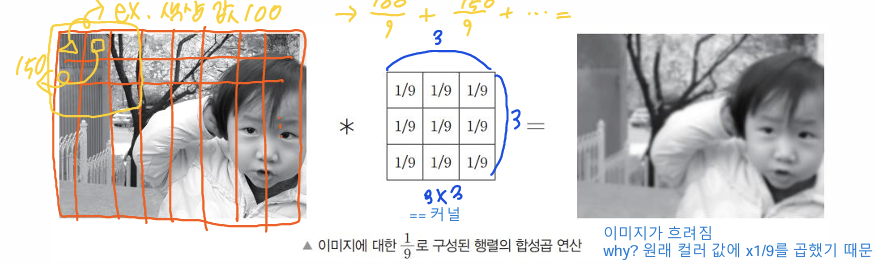

* 진행 과정
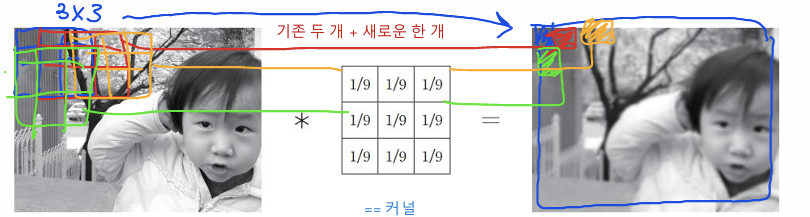

* 🌀🌀 겹치면서 한 칸씩 이동
* 위 사진은 블러 필터(블러 커널)가 됨
* -1, 8로 구성된 행렬의 합성곱 연산 시에는 본인 외의 값을 -1로 바꿔 윤곽선 필터(윤곽선 커널)가 됨
* Image Convolution : 이미지의 특징을 찾아주는 필터링 방법
* 영역별로 추출해 학습
  * 4x4 원본에 2x2 커널(필터)을 쓰면 결과 크기가 달라지는 이유가 되기도 (맞추는 방법 Oo)
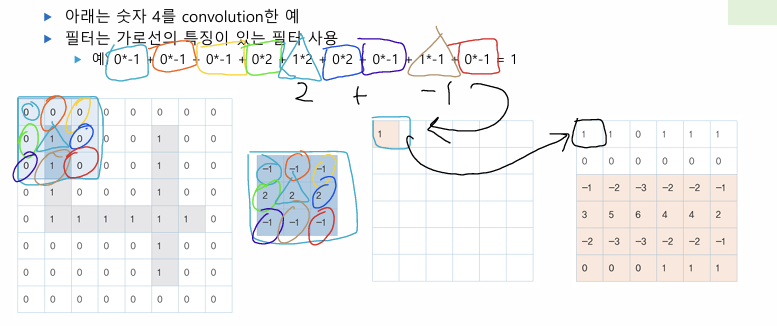

# CNN Code
One Hot Encoding

In [ ]:
import pandas as pd
import tensorflow as tf

In [ ]:
# 데이터 로드
(Xdata, Ydata), _ = tf.keras.datasets.mnist.load_data()
print(Xdata.shape, Ydata.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)


In [ ]:
# 데이터 준비
Xdata = Xdata.reshape(60000, 28, 28, 1)
Ydata = pd.get_dummies(Ydata)

reshape(60000, X축, Y축, Z축) : Convolution이 3차원을 가정하고 있기 때문

In [ ]:
#모델 생성
X = tf.keras.layers.Input(shape=[28, 28, 1])
# Convolution
H =  tf.keras.layers.Conv2D(3, kernel_size=5, activation='swish')(X)
H =  tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish')(H)

H =  tf.keras.layers.Flatten()(H) #1차원으로
H =  tf.keras.layers.Dense(84, activation='swish')(H)
Y =  tf.keras.layers.Dense(10, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics=['accuracy']) #10개(두 개 이상) 중 하나라서
# ValueError: Expected `metrics` argument to be a list, tuple, or dict. Received instead: metrics=accuracy of type <class 'str'>

In [ ]:
# 모델 학습
model.fit(Xdata, Ydata, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8628 - loss: 0.9259
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9764 - loss: 0.0813
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9878 - loss: 0.0434
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9902 - loss: 0.0322
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9935 - loss: 0.0215
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9954 - loss: 0.0183
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9960 - loss: 0.0141
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9968 - loss: 0.0124
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9964 - loss: 0.0121
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9975 - loss: 0.0100


In [ ]:
# 예상 및 정확도 확인
pred = model.predict(Xdata[0:5])
print(pred.round(2)) # 반올림
Ydata[0:5]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.   0.   0.   0.98 0.   0.02 0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


,0,1,2,3,4,5,6,7,8,9
0,False,False,False,False,False,True,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True


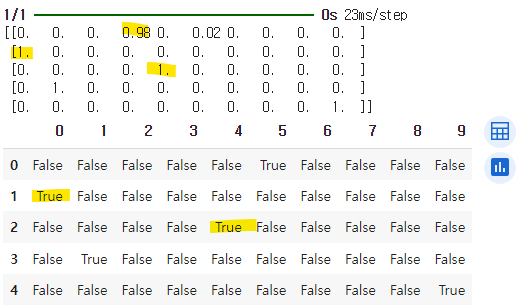

In [ ]:
pred2 = model.predict(Xdata[0:5])
print(pred2.round(1)) # 반올림
Ydata[0:5]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


,0,1,2,3,4,5,6,7,8,9
0,False,False,False,False,False,True,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True


# Pooling
* Max Pool ✅
  * why? 현재 사용 중인 이미지는 검은 배경의 흰색 숫자 == 흰색 숫자를 찾는 게 주목적임 == 흰색 숫자가 가지고 있는 값이 Max 값이기 때문에 MaxPooling을 쓰는 것 (도메인에 따라 달라진다 보면 됨)
* Average Pool

In [ ]:
#모델 생성
X = tf.keras.layers.Input(shape=[28, 28, 1])
# Convolution
H =  tf.keras.layers.Conv2D(3, kernel_size=5, activation='swish')(X)
#Pooling
H = tf.keras.layers.MaxPool2D()(H)
H =  tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish')(H)
#Pooling
H = tf.keras.layers.MaxPool2D()(H)

H =  tf.keras.layers.Flatten()(H)
H =  tf.keras.layers.Dense(84, activation='swish')(H)
Y =  tf.keras.layers.Dense(10, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 모델 학습
model.fit(Xdata, Ydata, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7518 - loss: 3.0522
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9542 - loss: 0.1567
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9656 - loss: 0.1132
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9719 - loss: 0.0970
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9759 - loss: 0.0844
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9765 - loss: 0.0801
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9798 - loss: 0.0744
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9796 - loss: 0.0688
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9806 - loss: 0.0694
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9809 - loss: 0.0677


In [ ]:
# 예상 및 정확도 확인
pred = model.predict(Xdata[0:5])
print(pred.round(1)) # 반올림
Ydata[0:5]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.  0.  0.  0.6 0.  0.4 0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


,0,1,2,3,4,5,6,7,8,9
0,False,False,False,False,False,True,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True


정확도가 떨어지기는 했다
However...................................... 으마으마하게 많은 데이터를 처리할 때에는 필요한 작업...... 이미지 크기를 줄여서 작업량을 줄이는...

<br>

------------------------------

<br>

# CNN Review

#### Vedio
* 영상은 어떤 연결 고리가 존재 == 응집
* 응집: 현재 라인과 다음 라인이 연관성을 가지고 있는 것에 대한 힌트 (CNN이 이 힌트를 찾는 작업)
* 영상 등을 분석할 때 단서의 유무는 큰 차가 有
